In [1]:
import scanpy as sc #for scanpy >= 1.3.7
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import logging
import os
import glob
import matplotlib
import math

In [2]:
savepath = '/domino/edv/id-td-virology/Zhiyuan/public/Gut_remap/processed_data/CD8.h5ad'
adata_CD8 = sc.read_h5ad(savepath)

In [4]:
sc.tl.paga(adata_CD8, groups='subtype')

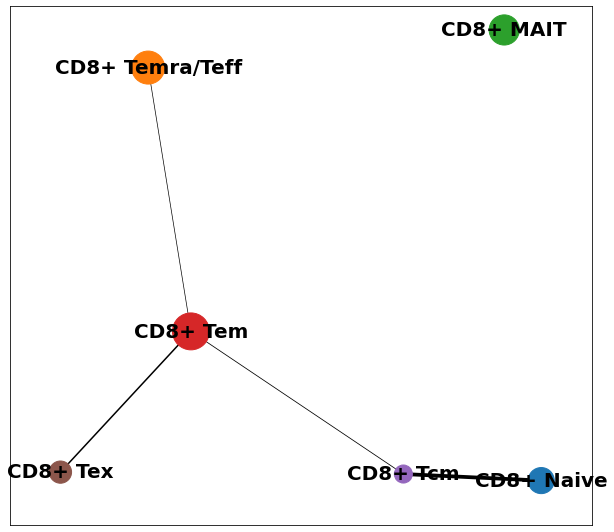

In [21]:
rcParams['figure.figsize']=(9,9)
rcParams['font.size']=20
sc.pl.paga(adata_CD8, color=['subtype'], threshold=0.15, node_size_scale = 5,
          edge_width_scale = 0.5)

In [14]:
#try a few more
adata_CD8.obs['subtype_2'] = adata_CD8.obs['subtype'].astype('object')

In [15]:
adata_CD8.obs.head()

,sample_id,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,total_counts_mt,pct_counts_mt,cell_quality,FinalAnnotation,SecondAnnotation,GeneralAnnotation,...,HBcAb (COI),HBsAg level (IU/ml),HBV DNA level (log10 IU/ml),ALT (U/L),AST (U/L),Stage,leiden_r0.8,leiden_r1,subtype,subtype_2
cell_barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGACAGACC-1-P190801_Liver_1,P190801_Liver_1,1550,3978.0,31.196581,265.0,6.661639,high,CD8+Texhausted,CD8+,CD3+,...,+,2527,7.01,224.0,91.0,G2S3,4,4,CD8+ Tex,CD8+ Tex
AAACCTGAGAGAGCTC-1-P190801_Liver_1,P190801_Liver_1,1482,3196.0,30.444305,300.0,9.386733,high,MAIT,CD8+,CD3+,...,+,2527,7.01,224.0,91.0,G2S3,0,14,CD8+ MAIT,CD8+ MAIT
AAACCTGAGCCTCGTG-1-P190801_Liver_1,P190801_Liver_1,917,1997.0,32.899349,116.0,5.808713,high,CD8+TEffector,CD8+,CD3+,...,+,2527,7.01,224.0,91.0,G2S3,4,4,CD8+ Tex,CD8+ Tex
AAACCTGCAATCCGAT-1-P190801_Liver_1,P190801_Liver_1,415,596.0,33.892617,26.0,4.362416,high,CD8+Texhausted,CD8+,CD3+,...,+,2527,7.01,224.0,91.0,G2S3,10,13,CD8+ Temra/Teff,CD8+ Temra/Teff
AAACCTGCACCGAATT-1-P190801_Liver_1,P190801_Liver_1,1567,3428.0,28.033839,326.0,9.509918,high,MAIT,CD8+,CD3+,...,+,2527,7.01,224.0,91.0,G2S3,0,14,CD8+ MAIT,CD8+ MAIT


In [16]:
adata_CD8.obs.loc[adata_CD8.obs.leiden_r1 == '9', 'subtype_2'] = 'Tem_IFNG'
adata_CD8.obs.loc[adata_CD8.obs.leiden_r1 == '1', 'subtype_2'] = 'Tem_CCL5'

In [17]:
sc.tl.paga(adata_CD8, groups='subtype_2')

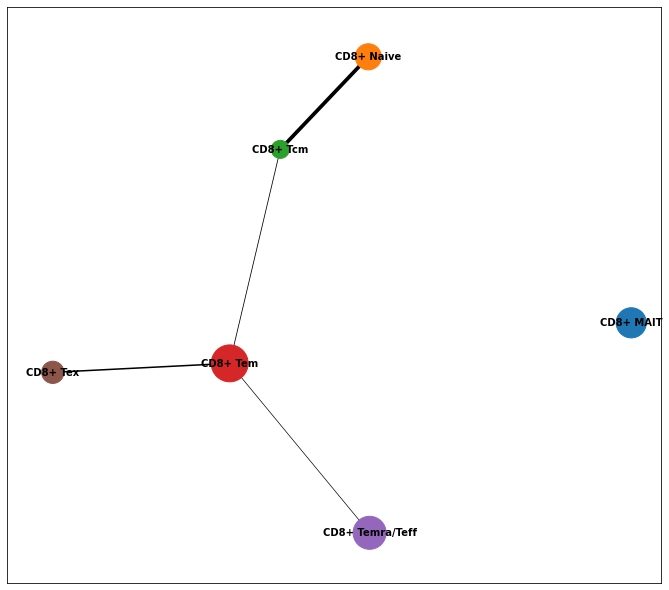

In [108]:
adata_CD8.obs['subtype_3'] = adata_CD8.obs['subtype'].astype('object')
adata_CD8.obs.loc[adata_CD8.obs.leiden_r1 == '4', 'subtype_3'] = 'CD8+ Tem'

sc.tl.paga(adata_CD8, groups='subtype_3')

rcParams['figure.figsize']=(10,10)
sc.pl.paga(adata_CD8, color=['subtype_3'], threshold=0.15, node_size_scale = 5,
          edge_width_scale = 0.5)


In [6]:
adata_CD8.uns['iroot'] = np.flatnonzero(adata_CD8.obs['subtype']  == 'CD8+ Naive')[0]
sc.tl.diffmap(adata_CD8)
sc.tl.dpt(adata_CD8)
sc.tl.umap(adata_CD8, init_pos='paga')

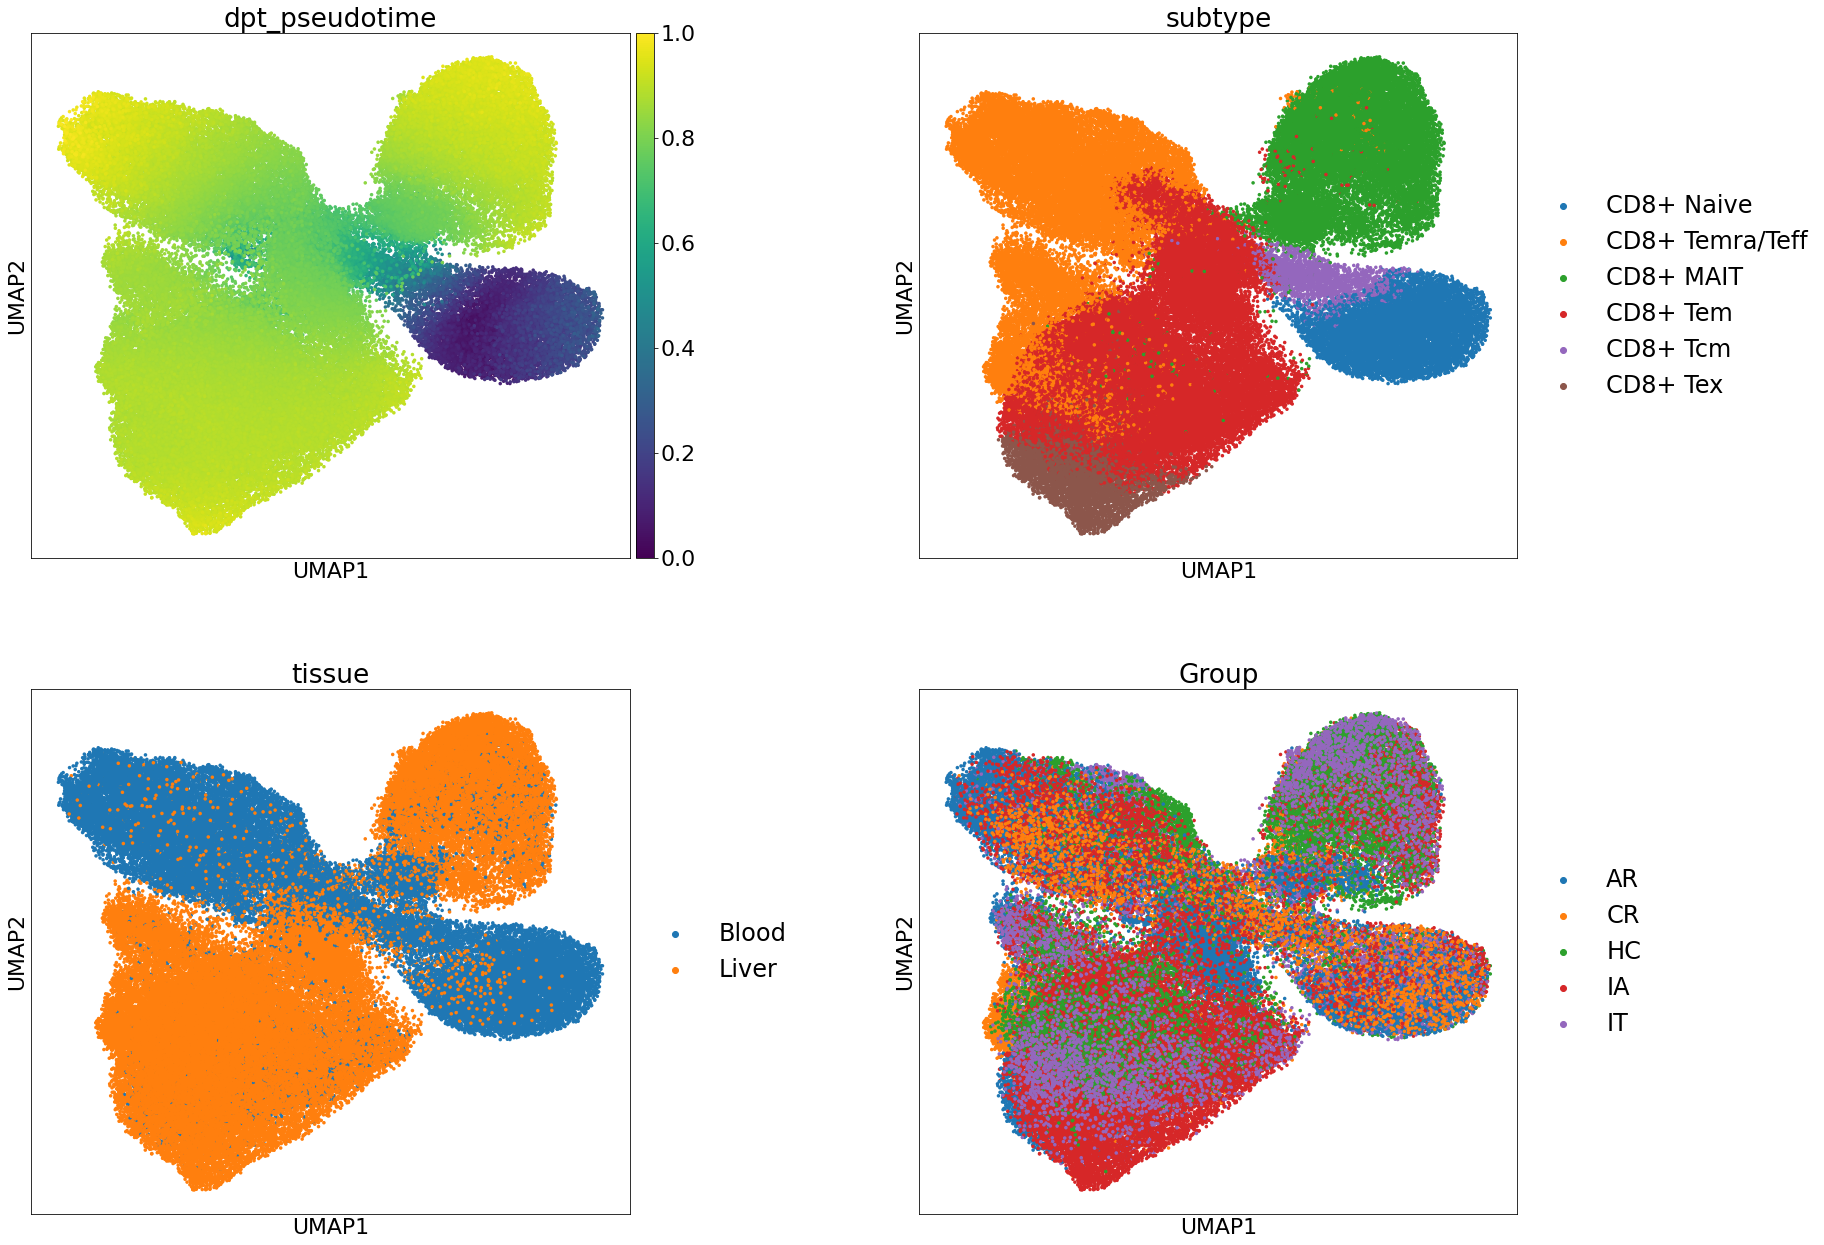

In [16]:
rcParams['figure.figsize']=(10,10)
rcParams['font.size']=22
sc.pl.umap(adata_CD8, color=['dpt_pseudotime', 'subtype', 'tissue', 'Group'], wspace = 0.35,s =50,
          legend_fontsize = 24,ncols = 2)

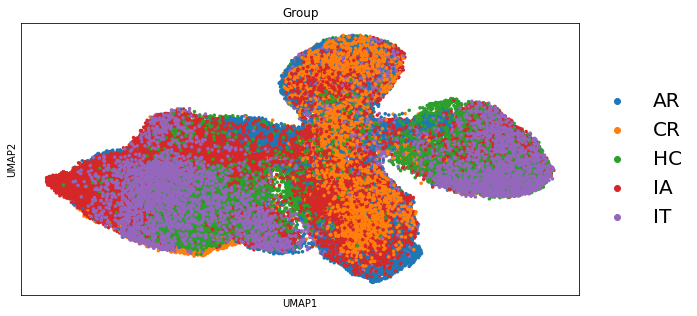

In [46]:
sc.pl.umap(adata_CD8, color=['Group'], s =50,
          legend_fontsize = 20)

In [26]:
adata_CD8.obs.subtype.unique()

['CD8+ Tex', 'CD8+ MAIT', 'CD8+ Temra/Teff', 'CD8+ Tem', 'CD8+ Tcm', 'CD8+ Naive']
Categories (6, object): ['CD8+ Naive', 'CD8+ Temra/Teff', 'CD8+ MAIT', 'CD8+ Tem', 'CD8+ Tcm', 'CD8+ Tex']

In [28]:
adata_CD8.obs

,sample_id,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,total_counts_mt,pct_counts_mt,cell_quality,FinalAnnotation,SecondAnnotation,GeneralAnnotation,...,HBsAg level (IU/ml),HBV DNA level (log10 IU/ml),ALT (U/L),AST (U/L),Stage,leiden_r0.8,leiden_r1,subtype,subtype_2,dpt_pseudotime
cell_barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGACAGACC-1-P190801_Liver_1,P190801_Liver_1,1550,3978.0,31.196581,265.0,6.661639,high,CD8+Texhausted,CD8+,CD3+,...,2527,7.01,224.0,91.0,G2S3,4,4,CD8+ Tex,CD8+ Tex,0.870913
AAACCTGAGAGAGCTC-1-P190801_Liver_1,P190801_Liver_1,1482,3196.0,30.444305,300.0,9.386733,high,MAIT,CD8+,CD3+,...,2527,7.01,224.0,91.0,G2S3,0,14,CD8+ MAIT,CD8+ MAIT,0.893721
AAACCTGAGCCTCGTG-1-P190801_Liver_1,P190801_Liver_1,917,1997.0,32.899349,116.0,5.808713,high,CD8+TEffector,CD8+,CD3+,...,2527,7.01,224.0,91.0,G2S3,4,4,CD8+ Tex,CD8+ Tex,0.839701
AAACCTGCAATCCGAT-1-P190801_Liver_1,P190801_Liver_1,415,596.0,33.892617,26.0,4.362416,high,CD8+Texhausted,CD8+,CD3+,...,2527,7.01,224.0,91.0,G2S3,10,13,CD8+ Temra/Teff,CD8+ Temra/Teff,0.817978
AAACCTGCACCGAATT-1-P190801_Liver_1,P190801_Liver_1,1567,3428.0,28.033839,326.0,9.509918,high,MAIT,CD8+,CD3+,...,2527,7.01,224.0,91.0,G2S3,0,14,CD8+ MAIT,CD8+ MAIT,0.933151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACACATTCGA-1-P190402_Liver_1,P190402_Liver_1,1449,3560.0,29.634831,112.0,3.146067,high,CD8+TEffector,CD8+,CD3+,...,47779,8.28,46.0,24.0,G0-1S1,7,7,CD8+ Temra/Teff,CD8+ Temra/Teff,0.877919
TTTGTCAGTAGGACAC-1-P190402_Liver_1,P190402_Liver_1,1441,3202.0,26.889444,111.0,3.466583,high,CD8+Texhausted,CD8+,CD3+,...,47779,8.28,46.0,24.0,G0-1S1,4,4,CD8+ Tex,CD8+ Tex,0.874385
TTTGTCAGTTCAGACT-1-P190402_Liver_1,P190402_Liver_1,1775,4706.0,26.285593,170.0,3.612410,high,CD8+TEffector,CD8+,CD3+,...,47779,8.28,46.0,24.0,G0-1S1,7,3,CD8+ Tem,CD8+ Tem,0.891112


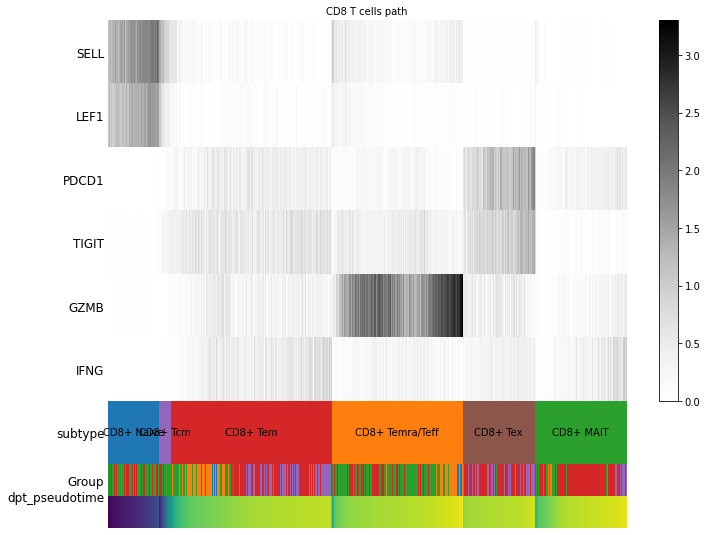

In [112]:
rcParams['figure.figsize']=(12,7)
gene_names = ['SELL', 'LEF1', 'PDCD1', 'TIGIT', 'GZMB',
              'IFNG']
sc.pl.paga_path(
        adata_CD8, ['CD8+ Naive', 'CD8+ Tcm', 'CD8+ Tem', 'CD8+ Temra/Teff','CD8+ Tex', 'CD8+ MAIT'], gene_names,
        show_node_names=True,
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['dpt_pseudotime', 'Group'],
        show_yticks=True,
        show_colorbar=True,
        color_map='Greys',
        groups_key='subtype',
        color_maps_annotations={'dpt_pseudotime': 'viridis', 'Group':newcmap},
        title='{} path'.format('CD8 T cells'),
        return_data=False,
        show=True)

/opt/conda/lib/python3.8/site-packages/scanpy/plotting/_tools/paga.py:1226: UserWarning: FixedFormatter should only be used together with FixedLocator
  groups_axis.set_yticklabels(['', xlabel, ''], fontsize=ytick_fontsize)
/opt/conda/lib/python3.8/site-packages/scanpy/plotting/_tools/paga.py:1273: UserWarning: FixedFormatter should only be used together with FixedLocator
  anno_axis.set_yticklabels(['', anno, ''], fontsize=ytick_fontsize)


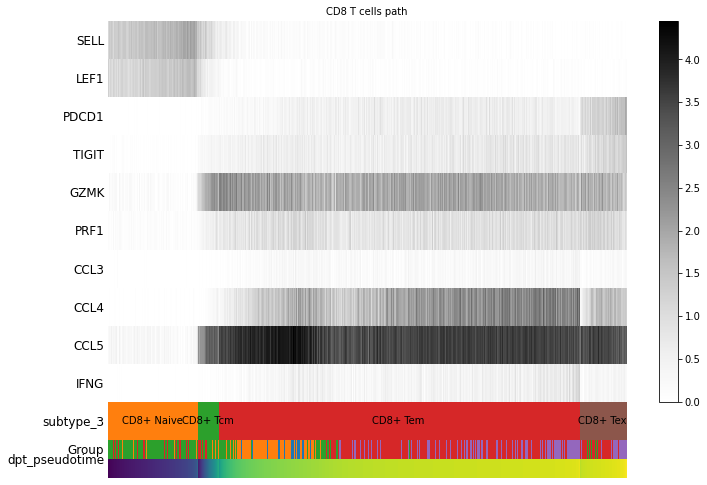

In [109]:
rcParams['figure.figsize']=(12,7)
gene_names = ['SELL', 'LEF1', 'PDCD1', 'TIGIT', 'GZMK', 'PRF1', 'CCL3', 'CCL4', 'CCL5',
              'IFNG']
sc.pl.paga_path(
        adata_CD8, ['CD8+ Naive', 'CD8+ Tcm', 'CD8+ Tem', 'CD8+ Tex'], gene_names,
        show_node_names=True,
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['dpt_pseudotime', 'Group'],
        show_yticks=True,
        show_colorbar=True,
        color_map='Greys',
        groups_key='subtype_3',
        color_maps_annotations={'dpt_pseudotime': 'viridis', 'Group':newcmap},
        title='{} path'.format('CD8 T cells'),
        return_data=False,
        show=True)

In [ ]:
palatte = []

In [99]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
a = cm.get_cmap('tab10')
newcolors = a(range(5))
newcmap = ListedColormap(newcolors)

In [98]:
newcolors

array([[0.1215686275, 0.4666666667, 0.7058823529, 1.          ],
       [1.          , 0.4980392157, 0.0549019608, 1.          ],
       [0.1725490196, 0.6274509804, 0.1725490196, 1.          ],
       [0.8392156863, 0.1529411765, 0.1568627451, 1.          ],
       [0.5803921569, 0.4039215686, 0.7411764706, 1.          ]])

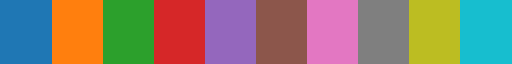

In [102]:
a

In [43]:
adata_CD8.obs.Group.unique()

['IA', 'CR', 'HC', 'AR', 'IT']
Categories (5, object): ['AR', 'CR', 'HC', 'IA', 'IT']

In [105]:
adata_CD8.obs.groupby('Group').size()

Group
AR    19771
CR    12783
HC    18825
IA    30105
IT    15328
dtype: int64

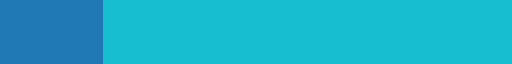

In [95]:
newcmap 